# Consumer Finance Company Credit Risk Analysis

### PROBLEM STATEMENT

**The purpose of this study is to help the Consumer Finance Bank under analysis to help take better credit decisions based on Customer Credit Behaviour Data, which includes several Social,Economic and Demographic Parameters and other miscillaneous variables relevant to credit study. The pattern Analysis has been based majorly on the Target Variable of Default/Non-Default Categories and based on the associations of Variables with the Target Varibale, analysis has been made. The data analysis aims to help the Consumer Finance Company identify areas of concern and thereby help in making better credit decisions.The study is based on Exploratory Data analysis on Consumer Credit data and can be used as the starting point of conducting further research and also as a basis for building predictive Credit Risk models**
 

## Import modules and warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd , numpy as np
import random
import matplotlib.pyplot as plt , seaborn as sns
import scipy.stats as stats
%matplotlib inline

pd.set_option('display.max_column',150) #if set to None this displays all columns

## Data Reading 

In [3]:
c_app = pd.read_csv('application_data.csv')
c_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
c_app.shape

(307511, 122)

In [5]:
c_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

#### Identification of Categorical Columns through nunique (Rule of thumb- upto 50 unique categories can generally be considered as categorical)

In [6]:
c_app.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

### Changing Data Types where necessary

**Data types can be correcetd using astype if desired (A blank can be interpreted as string and hence numerical value will be interpreted as string. In such a case the variable cant be convereted to float as pandas identifies as strinmg. For such cases tonumeric can be used. To avoid this add errors='coerce' and it will return Nan values for invalid parsing). df[abc]=pd.tonumeric(df.abc,errors='coerce')**

>DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH should not be negative
>DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH should be integers and not float as values are in days. Change the data type to integer

In [7]:
c_app.DAYS_BIRTH = c_app.DAYS_BIRTH.abs()
c_app.DAYS_EMPLOYED = c_app.DAYS_EMPLOYED.abs()
c_app.DAYS_REGISTRATION = c_app.DAYS_REGISTRATION.abs()
c_app.DAYS_ID_PUBLISH = c_app.DAYS_ID_PUBLISH.abs()

In [8]:
c_app.DAYS_BIRTH = c_app.DAYS_BIRTH.astype(int)
c_app.DAYS_EMPLOYED = c_app.DAYS_EMPLOYED.astype(int)
c_app.DAYS_REGISTRATION = c_app.DAYS_REGISTRATION.astype(int)
c_app.DAYS_ID_PUBLISH = c_app.DAYS_ID_PUBLISH.astype(int)

## Data Handling and Cleaning

### Checking the null values 

In [9]:
(c_app.isnull().sum()*100)/len(c_app)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

**Drop the coulmns where there are more than 50% of null values**

In [10]:
cols_to_drop1 = c_app.columns[c_app.isnull().mean()>=0.5]
c_app.drop(cols_to_drop1,axis=1,inplace=True)

In [11]:
c_app.shape

(307511, 81)

In [12]:
c_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [13]:
c_app.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

### Choosing a best matric to fill the null values for variables with missing values less than 14 percent

In [14]:
c_app.columns[c_app.isnull().mean() < 0.14]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

#### Null Values are not imputed but which matrix will be used  for imputation is decided, for variables with around 14 percent missing values
- For Categorical variables, find the mode of the values or the value with highest frequency needs to be replaced(max 40-50 unique values)
- For Continous Variables (the more the no unique values continuous columns)
    **if** we find outliers we use the median imputation as mean might present a skewed value, 
    **else** will use the mean imputation
- Another important criteria while doing imputations is not to impact or alter the business logic, which could be detrimental to analysis. In such cases we would replace the missing value with a dummy, that would not harm the analysis. The imputations suggested below are solely for the purpose of  demonstration and the variables chosen are such that won't impact business analysis after imputation

#### Calculate total number of inquiries made for all Clients in the year by adding corresponding AMT_REQ_CREDIT_BUREAU values. Impute the missing values with 0, as imputing with mean could be misleading, even though AMT_REQ_CREDIT_BUREAU_TOTAL is a continuous variable

In [15]:
c_app['AMT_REQ_CREDIT_BUREAU_TOTAL'] = c_app.AMT_REQ_CREDIT_BUREAU_HOUR+c_app.AMT_REQ_CREDIT_BUREAU_DAY+c_app.AMT_REQ_CREDIT_BUREAU_WEEK+c_app.AMT_REQ_CREDIT_BUREAU_MON+c_app.AMT_REQ_CREDIT_BUREAU_QRT+c_app.AMT_REQ_CREDIT_BUREAU_YEAR

In [16]:
c_app['AMT_REQ_CREDIT_BUREAU_TOTAL'].isnull().mean() 

0.13501630835970097

In [17]:
c_app['AMT_REQ_CREDIT_BUREAU_TOTAL'].fillna(0, inplace= True)

In [18]:
c_app['AMT_REQ_CREDIT_BUREAU_TOTAL'].isnull().mean() 

0.0

In [19]:
c_app.FLAG_DOCUMENT_2.isnull().mean() 

0.0

Values relating to **CNT_SOCIAL_CIRCLE** variables reflect the number of persons in client's social circle (friends, family…) with observable/defaulted on 30 days past due. Taking a cue from Behavioural Finance, it can be assumed that Clients with missing values will have DPD value tending close to the group median/mean, depending on outlier information   

In [20]:
c_app.OBS_30_CNT_SOCIAL_CIRCLE.isnull().mean() 

0.0033202064316398437

In [21]:
c_app.DEF_30_CNT_SOCIAL_CIRCLE.isnull().mean() 

0.0033202064316398437

In [22]:
c_app.OBS_60_CNT_SOCIAL_CIRCLE.isnull().mean() 

0.0033202064316398437

In [23]:
c_app.DEF_60_CNT_SOCIAL_CIRCLE.isnull().mean() 

0.0033202064316398437

#### Outlier analysis through BOX plots

In [24]:
c_app.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

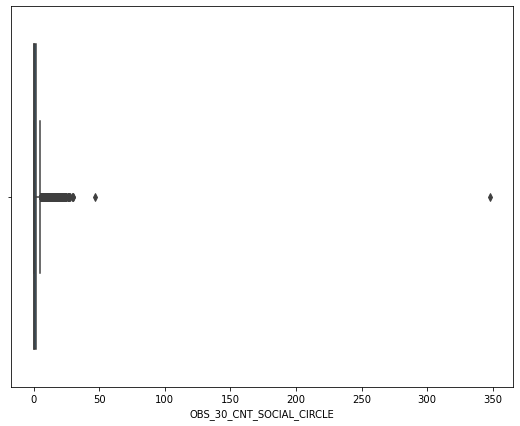

In [25]:
# Box plot - 1:

plt.figure(figsize=[9,7])
sns.boxplot(c_app.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [26]:
c_app.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

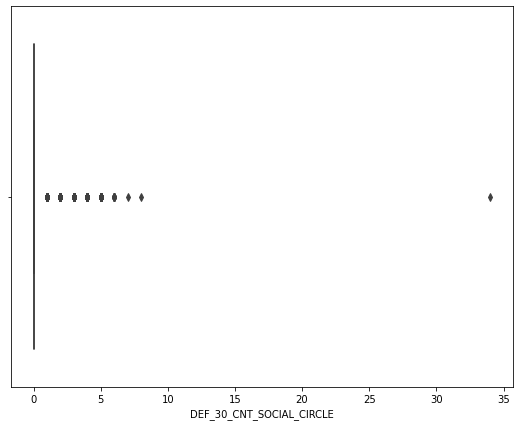

In [27]:
# Box plot - 2:

plt.figure(figsize=[9,7])
sns.boxplot(c_app.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [28]:
c_app.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

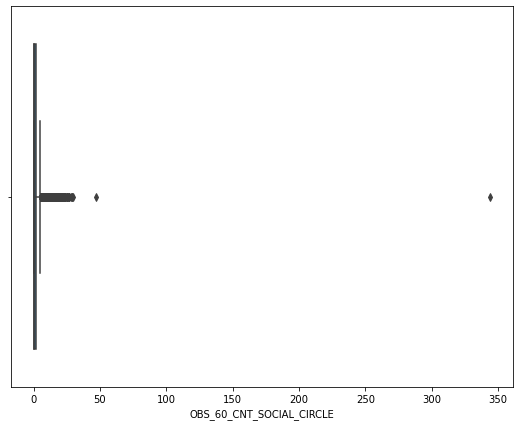

In [29]:
# Box plot - 3:

plt.figure(figsize=[9,7])
sns.boxplot(c_app.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [30]:
c_app.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

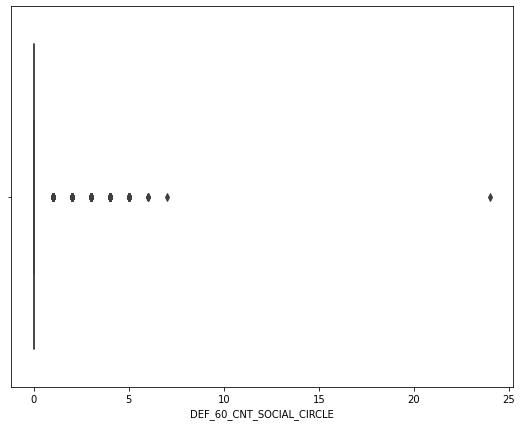

In [31]:
# Box plot - 4:

plt.figure(figsize=[9,7])
sns.boxplot(c_app.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

- For variables **OBS_30_CNT_SOCIAL_CIRCLE** and **OBS_60_CNT_SOCIAL_CIRCLE** the maximum values are 348 and 344 respectively, which heavily skew the mean. In such case imputation with median values seems more appropriate. 
- For variables **DEF_30_CNT_SOCIAL_CIRCLE** and **DEF_60_CNT_SOCIAL_CIRCLE** the maximum values are 34 and 24 respectively, which are clear outliers and result in a skewed mean. Hence here also imputing with median is recommended - 0 in all four cases

In [32]:
c_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)
c_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)
c_app.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)
c_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)

In [33]:
c_app.OCCUPATION_TYPE.isnull().mean() 

0.31345545362604915

**OCCUPATION_TYPE** this is a categorical variable, but with more than 30 % missing values. Categorical variables are imputed with mode or a  variable with hifg frequency  for missing values where feasible. Here as shown below the value **Laborers** has the highest frequency among the occupation type so it can be used to replace the null values in the column

In [34]:
c_app.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [35]:
c_app.EXT_SOURCE_2.isnull().mean()

0.0021462646864665006

In [36]:
c_app.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

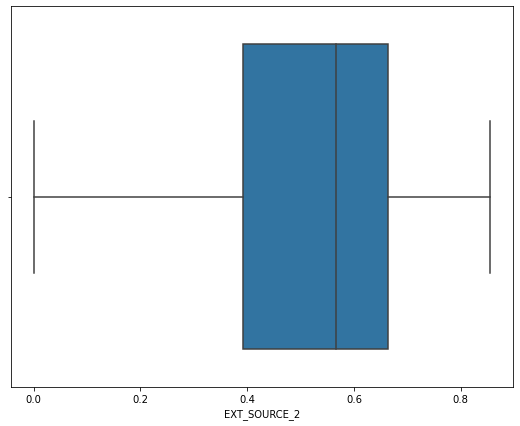

In [37]:
# Box plot - 5:

plt.figure(figsize=[9,7])
sns.boxplot(c_app.EXT_SOURCE_2)
plt.show()

**EXT_SOURCE_2** represents what looks like credit score data. The box plot shows no outliers with a mean value of 0.514. Less than 0.5 percent values are missing and in this case the missing value can be replaced with the mean value 

## Binning values

**Create bins for Income column for Income segment analysis** 

In [38]:
c_app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
#create the buckets of 'Very_Low_Income','Low_Income','Mid_Income','High_Income','Very_High_Income' from AMT_INCOME_TOTAL column.

c_app['INCOME_GROUP']=pd.cut(c_app. AMT_INCOME_TOTAL,[25000,50000,100000,150000,200000,125000000],labels=('Very_Low_Income','Low_Income','Mid_Income','High_Income','Very_High_Income'))

In [40]:
c_app['INCOME_GROUP']

0         Very_High_Income
1         Very_High_Income
2               Low_Income
3               Mid_Income
4               Mid_Income
                ...       
307506         High_Income
307507          Low_Income
307508         High_Income
307509         High_Income
307510         High_Income
Name: INCOME_GROUP, Length: 307511, dtype: category
Categories (5, object): [Very_Low_Income < Low_Income < Mid_Income < High_Income < Very_High_Income]

#### Create Age column in years and bin it into groups 

In [41]:
c_app['AGE'] = c_app.DAYS_BIRTH/365

In [42]:
c_app['AGE'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [43]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from AGE column.

c_app['AGE_GROUP']=pd.cut(c_app.AGE,[0,30,40,50,60,70],labels=('<30','<30-40','<40-50','<50-60','<60+'))

In [44]:
c_app.AGE_GROUP

0            <30
1         <40-50
2         <50-60
3         <50-60
4         <50-60
           ...  
307506       <30
307507    <50-60
307508    <40-50
307509    <30-40
307510    <40-50
Name: AGE_GROUP, Length: 307511, dtype: category
Categories (5, object): [<30 < <30-40 < <40-50 < <50-60 < <60+]

**Check the imbalance percentage**

In [45]:
c_app.TARGET.value_counts(normalize = True)  

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

The target variable suggest the clients pay loan at time , Non-Default i.e **0** where as clients who have dificulties yo pay loan on time , they default i.e **1**. Here the Non-Default class and Default class has differnce in their observations , so the data is very highly imbalanced

**Selection of Variables for the Analysis**

In [46]:
selected_variables = c_app[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY',
        'AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE','AGE','DAYS_EMPLOYED','OCCUPATION_TYPE','REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','AMT_REQ_CREDIT_BUREAU_TOTAL','INCOME_GROUP','AGE_GROUP']]

In [47]:
df = selected_variables.copy()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [49]:
df.nunique().sort_values()

FLAG_DOCUMENT_4                     2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_3                     2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
INCOME_GROUP                        5
AGE_GROUP                           5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_SOCIAL_CIRCLE           10
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_TOTAL        30
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_SOCIAL_CIRCLE           33
ORGANIZATION_TYPE                  58
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT  

In [50]:
#Dividing the dataframe into two dataframes based on the TARGET VARIABLE
df0 = df[df['TARGET']==0] # Non Default
df1 = df[df['TARGET']==1] # Default

### Correlation

**Finding the correlation check which variable pairs have been strongly realated**

In [51]:
corr0 = df0.corr()

In [52]:
corr0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))

In [53]:
corr0.unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN
...,...,...,...
356,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_2,-0.005284
357,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_3,0.045691
358,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_4,0.003003
359,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_5,-0.006238


In [54]:
corr0_df = corr0.unstack().reset_index()
corr0_df.columns = ['Var1' , 'Var2','Correlation'] # Name the columns as Var1 and Var2 holding the variable names between which the correlation is found and the third column as Correlation holding the correlation value

In [55]:
corr0_df.dropna(subset =['Correlation'],inplace = True)

In [56]:
corr0_df # It is nto be noted that all variables are considered(including categorical, but which happen to contain numeric values like SK_ID_CURR and hence those Correlation values can be ignored and considered irrelevant)

,Var1,Var2,Correlation
38,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
57,AMT_CREDIT,SK_ID_CURR,-0.000342
59,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
76,AMT_ANNUITY,SK_ID_CURR,0.000068
78,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
...,...,...,...
355,AMT_REQ_CREDIT_BUREAU_TOTAL,DEF_60_CNT_SOCIAL_CIRCLE,0.011796
356,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_2,-0.005284
357,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_3,0.045691
358,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_4,0.003003


In [57]:
corr0_df['Correlation_Abs'] = corr0_df['Correlation'].abs() # Correlation_Abs shows only strength of the association and not the direction of association

In [58]:
corr0_df.sort_values("Correlation_Abs" , ascending=False , inplace = True)

In [59]:
corr0_df.head(40)

,Var1,Var2,Correlation,Correlation_Abs
238,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,0.998510
98,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
179,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
258,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371,0.859371
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
79,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
139,DAYS_EMPLOYED,AGE,0.626114,0.626114
78,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
97,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
59,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799


### ANALYSIS OF CORRELATION VALUES IN df0- Non Defaulter Behavious Analysis


- There is a very strong correlation between **OBS_60_CNT_SOCIAL_CIRCLE** and **OBS_30_CNT_SOCIAL_CIRCLE** of 0.998- If a Loan Client has observations of  social surroundings with observable 30 DPD (days past due) default.Then he is also very likely to have observations of  social surroundings with observable 60 DPD (days past due) default. That is it is likely that the Bank will find it hard to recover loan after 30 days of non payment and the pattern will continue after 60 days as well-that is non payment of dues in cases of those observations.


- There is a very strong correlation between **AMT_GOODS_PRICE** and	**AMT_CREDIT** of 0.987- giving credence to the general knowledge that costlier the goods, more the credit amount disbursed.


- There is a very strong correlation between **DEF_60_CNT_SOCIAL_CIRCLE** and **DEF_30_CNT_SOCIAL_CIRCLE** of 0.859- If a Loan Client has observations of  social surroundings who defaulted on 30 DPD.Then he is also very likely to have observations of  social surroundings who defaulted on 60 DPD. 


- There is a low to medium correlation between **AMT_CREDIT** and **AMT_INCOME_TOTAL** of 0.34- High income people are not that inclined to take a higher credit in the given observations

- There is a low correlation between **OBS_30_CNT_SOCIAL_CIRCLE** and **DEF_30_CNT_SOCIAL_CIRCLE** of 0.329- The chances of observations with 60 DPD to default on 30 DPD are low. This is probably because the trigger of DPD for defaulting is higher, generally around 90/180 days

- There is a low to medium correlation between **OBS_60_CNT_SOCIAL_CIRCLE** and **DEF_60_CNT_SOCIAL_CIRCLE** of 0.255- The chances of observations with 60 DPD to default on 60 DPD are low to medium. This is probably because the trigger of DPD for defaulting is higher, generally around 90/180 days

- There is a low correlation between **OBS_30_CNT_SOCIAL_CIRCLE** and **DEF_60_CNT_SOCIAL_CIRCLE** of 0.25- The chances of observations with 30 DPD to default on 60 DPD are low. 

- There is negligibe correlation between **AGE** and **AMT_CREDIT**	also between **AGE** and **AMT_GOODS_PRICE**, indicating that AGE has not much to do with Credit Consumption and Goods Consumption amount in given observations


#### Finding the correlation among the variables in df1 dataframe

In [60]:
corr1 = df1.corr()

In [61]:
corr1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))

In [62]:
corr1.unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN
...,...,...,...
356,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_2,-0.011927
357,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_3,0.042932
358,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_4,NaN
359,AMT_REQ_CREDIT_BUREAU_TOTAL,FLAG_DOCUMENT_5,-0.003463


In [63]:
corr1_df = corr1.unstack().reset_index()
corr1_df.columns = ['Var1' ,'Var2','Correlation']

In [64]:
corr1_df.dropna(subset =['Correlation'],inplace = True)

In [65]:
corr1_df.head()

,Var1,Var2,Correlation
38,AMT_INCOME_TOTAL,SK_ID_CURR,-0.010165
57,AMT_CREDIT,SK_ID_CURR,-0.001290
59,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
76,AMT_ANNUITY,SK_ID_CURR,-0.007578
78,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421


In [66]:
corr1_df['Correlation_Abs'] = corr1_df['Correlation'].abs()

In [67]:
corr1_df.sort_values("Correlation_Abs" , ascending=False , inplace = True)

In [68]:
corr1_df.head(40)

,Var1,Var2,Correlation,Correlation_Abs
238,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270,0.998270
98,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
179,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
258,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016,0.869016
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
79,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
139,DAYS_EMPLOYED,AGE,0.582185,0.582185
239,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.337389,0.337389
219,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.334035,0.334035
292,FLAG_DOCUMENT_3,DAYS_EMPLOYED,-0.272169,0.272169


### ANALYSIS OF CORRELATION VALUES IN df1- Default Client Behavious Analysis


- There is a very strong correlation between **OBS_60_CNT_SOCIAL_CIRCLE** and **OBS_30_CNT_SOCIAL_CIRCLE** of 0.998- If a Loan Client has observations of  social surroundings with observable 30 DPD (days past due) default.Then he is also very likely to have observations of  social surroundings with observable 60 DPD (days past due) default. That is it is likely that the Bank will find it hard to recover loan after 30 days of non payment and the pattern will continue after 60 days as well-that is non payment of dues in cases of those observations.


- There is a very strong correlation between **AMT_GOODS_PRICE** and **AMT_CREDIT**	of 0.983- giving credence to the general knowledge that costlier the goods, more the credit amount disbursed.


- There is a very strong correlation between **DEF_60_CNT_SOCIAL_CIRCLE** and **DEF_30_CNT_SOCIAL_CIRCLE** of 0.86- Client with observations of deafult on 30 days is likely to have social observations who defaulted on 60 days

- There is a low correlation between **DEF_60_CNT_SOCIAL_CIRCLE** and **OBS_60_CNT_SOCIAL_CIRCLE** of 0.26- Observations with 60 DPD might not default on 60 days. This might indicate loan recovery as well.

- There is a negligible correlation between **AMT_CREDIT** and **AMT_INCOME_TOTAL** of 0.038- High income people are not that inclined to take a higher credit in the given observations. The correlation value in the Non-Defaulter Behaviour Analysis was low to medium-0.34, indicating a more responsible consumption pattern among observations


- There is a low to medium correlation between **OBS_30_CNT_SOCIAL_CIRCLE** and **DEF_30_CNT_SOCIAL_CIRCLE** of 0.33- The chances of observations with 30 DPD to default on 30 DPD are low to medium. This is probably because the trigger of DPD for defaulting is higher, generally around 90/180 days

- There is a low correlation between **OBS_60_CNT_SOCIAL_CIRCLE** and **DEF_60_CNT_SOCIAL_CIRCLE** of 0.26- The chances of observations with 60 DPD to default on 60 DPD are low. This is probably because the trigger of DPD for defaulting is higher, generally around 90/180 days. This value was slightly higher among non-defaulters-0.33

- There is a low correlation between **OBS_30_CNT_SOCIAL_CIRCLE** and **DEF_60_CNT_SOCIAL_CIRCLE** of 0.26- The chances of observations with 30 DPD to default on 60 DPD are low. 

- There is negligibe correlation between **AGE** and **AMT_CREDIT** Also between **AGE** and **AMT_GOODS_PRICE**, indicating that AGE has not much to do with Credit Consumption and Goods Consumption amount in given observations

- There is negligible correlation between **DEF_60_CNT_SOCIAL_CIRCLE**	and **AMT_CREDIT**. Hence more credit disbursed does not mean that there will be more defaulters among the relations of  Clients in given observations

In [69]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_TOTAL,INCOME_GROUP,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,637,Laborers,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,0,1,0,0,1.0,Very_High_Income,<30
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,1188,Core staff,1,1,School,1.0,0.0,1.0,0.0,0,1,0,0,0.0,Very_High_Income,<40-50
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,225,Laborers,2,2,Government,0.0,0.0,0.0,0.0,0,0,0,0,0.0,Low_Income,<50-60
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,3039,Laborers,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,0,1,0,0,0.0,Mid_Income,<50-60
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,3038,Core staff,2,2,Religion,0.0,0.0,0.0,0.0,0,0,0,0,0.0,Mid_Income,<50-60
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,46.413699,1588,Laborers,2,2,Other,0.0,0.0,0.0,0.0,0,1,0,0,2.0,Low_Income,<40-50
6,100009,0,Cash loans,F,Y,Y,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,37.747945,3130,Accountants,2,2,Business Entity Type 3,1.0,0.0,1.0,0.0,0,0,0,0,4.0,High_Income,<30-40
7,100010,0,Cash loans,M,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,House / apartment,51.643836,449,Managers,3,3,Other,2.0,0.0,2.0,0.0,0,1,0,0,0.0,Very_High_Income,<50-60
8,100011,0,Cash loans,F,N,Y,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.065753,365243,NaN,2,2,XNA,1.0,0.0,1.0,0.0,0,1,0,0,1.0,Mid_Income,<50-60
9,100012,0,Revolving loans,M,N,Y,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,39.641096,2019,Laborers,2,2,Electricity,2.0,0.0,2.0,0.0,0,0,0,0,0.0,Mid_Income,<30-40


### Univariate Analysis and Bivariate Analysis

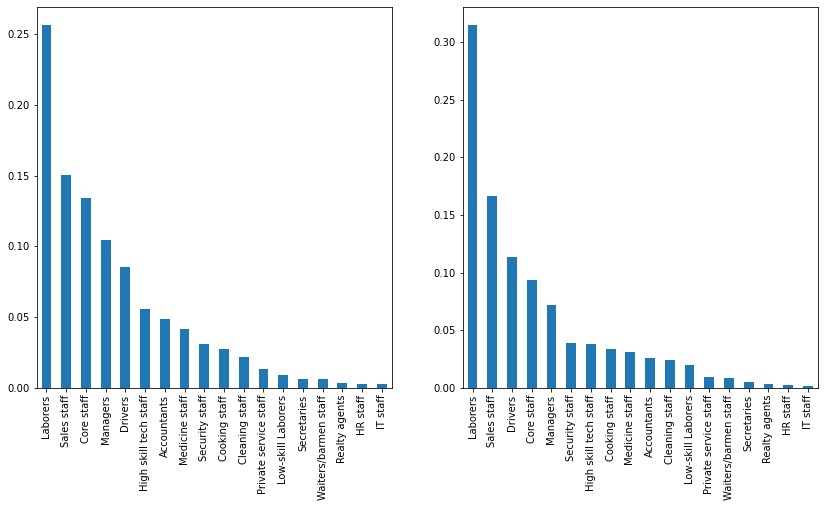

In [71]:
#Uniivariate analysis ,[Unordered Categorical varaiable]
#Which ocupation type is going to be repayed loan on time and not
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
df0['OCCUPATION_TYPE'].value_counts(normalize=True).plot(kind='bar' , label = 'Non-Defaulters')

plt.subplot(1,2,2)
df1['OCCUPATION_TYPE'].value_counts(normalize=True).plot(kind='bar' , label = 'Defaulters')
plt.show()

 **In the Defaulter Group-df1, more than 30% clients are Labourers and in the Non-Defaulter Group-df0 around 26 percent are Labourers-this is in line to popular assumption that Higher percentage of Labourers should correspond to higher defaults because of payment difficulties owing to socio-economic reasons**

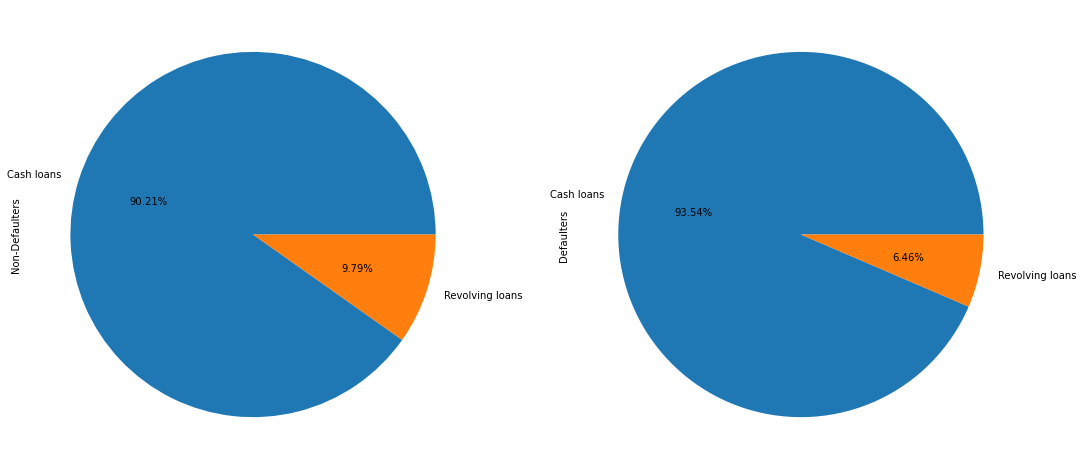

In [73]:
# Which type of loan is going to be repayed on time and not
plt.figure(figsize = (18,10))
plt.subplot(1,2,1)
df0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot(kind='pie' , label = 'Non-Defaulters',autopct='%1.2f%%')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
df1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot(kind='pie' , label = 'Defaulters',autopct='%1.2f%%')
plt.xticks(rotation = 90)
plt.show()

**We can see that Non-Defaulter category has higher percentage of Revolving loans, which could be higher risk category and but also more profitable as long as the dues are paid on time**

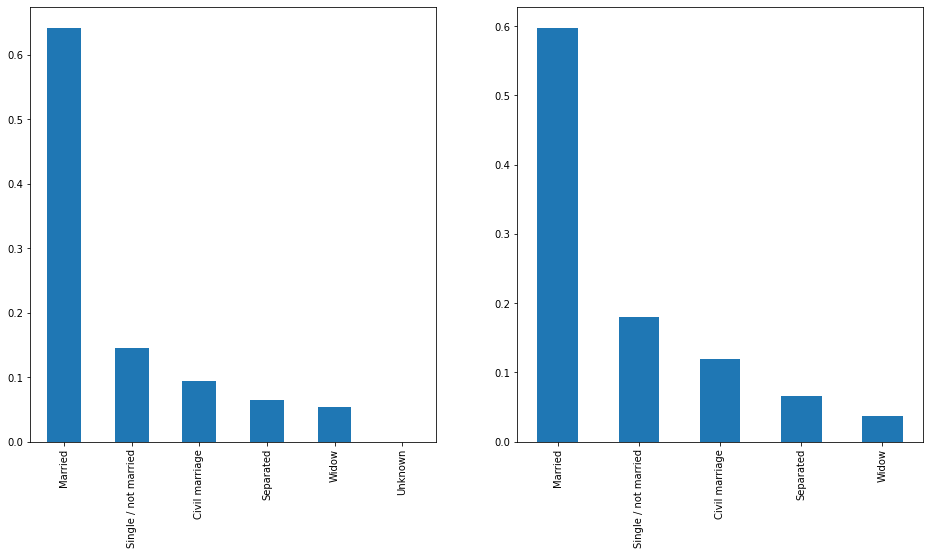

In [74]:
# What family status category will repay the loan on time and not  
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
df0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot(kind='bar' , label = 'Non-Defaulters')

plt.subplot(1,2,2)
df1['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot(kind='bar' , label = 'Defaulters')
plt.show()

**Non-Defaulter group has more percentage of Married Clients and less number of Unmarried Clients as compared to Defaulters. It could be because of increase in income because of age and spousal earnings of clients. Singles are more in Defaulter segment- close to 20% as opposed to 15% in N0n Defaulter category**

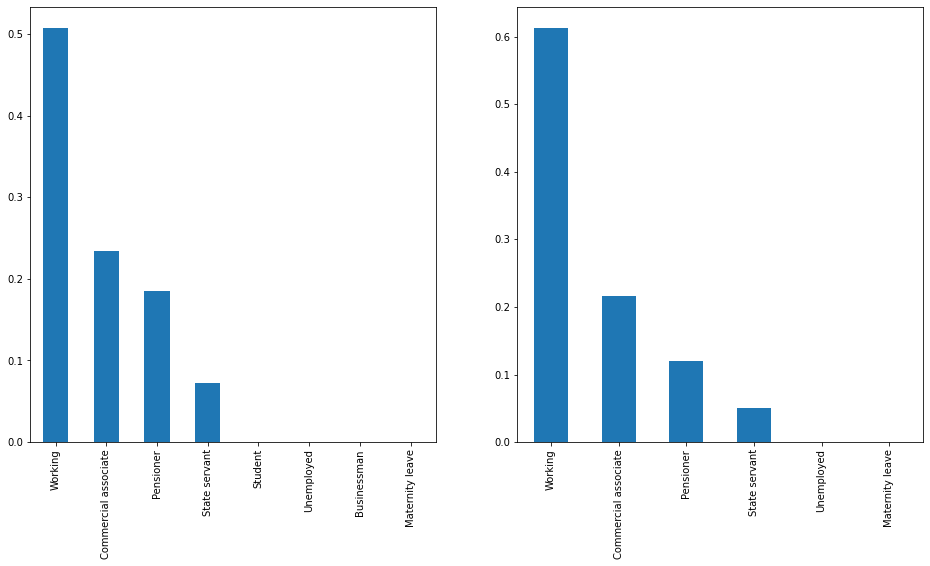

In [75]:
# Which income types clients will repay the loan and not 
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
df0.NAME_INCOME_TYPE.value_counts(normalize=True).plot(kind='bar' , label = 'Non-Defaulters')

plt.subplot(1,2,2)
df1.NAME_INCOME_TYPE.value_counts(normalize=True).plot(kind='bar' , label = 'Defaulters')

plt.show()

**Non-Defaulter group has higher Commercial associate,State Servants and Pensioners than Defaulter Category**

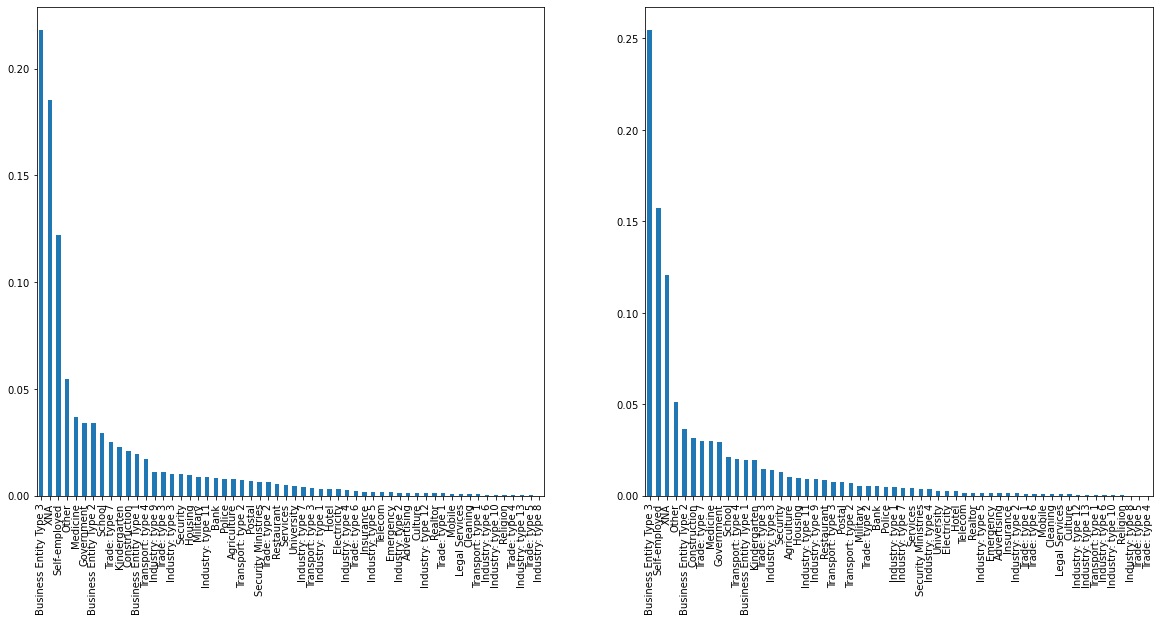

In [76]:
# Which organization category will repay the loan and not 
plt.figure(figsize = (20,9))
plt.subplot(1,2,1)
df0.ORGANIZATION_TYPE.value_counts(normalize=True).plot(kind='bar' , label = 'Non-Defaulters')

plt.subplot(1,2,2)
df1.ORGANIZATION_TYPE.value_counts(normalize=True).plot(kind='bar' , label = 'Defaulters')

plt.show()

**Defaulter group has around 25 percent of Business Entity Type 3, followed by Self Employed- these Organization categories are high risk and strong BGVs should be conducted before loans are disbursed.**

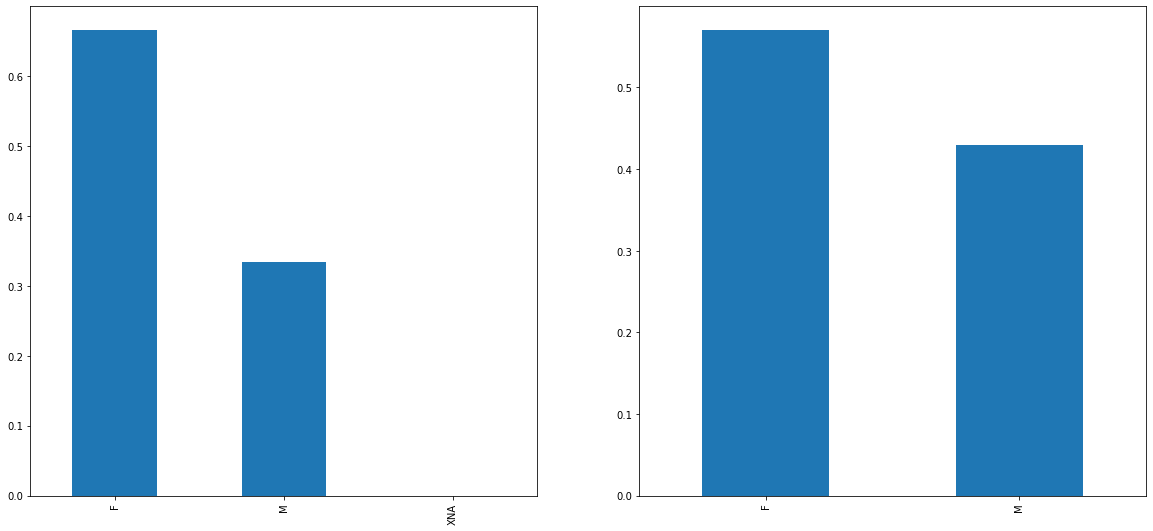

In [77]:
#Whether maiel or female pay the loan on time or not
plt.figure(figsize = (20,9))
plt.subplot(1,2,1)
df0.CODE_GENDER.value_counts(normalize=True).plot(kind='bar' , label = 'Non-Defaulters')

plt.subplot(1,2,2)
df1.CODE_GENDER.value_counts(normalize=True).plot(kind='bar' , label = 'Defaulters')

plt.show()

**Non-Defaulter Category has a higher percenatge of Females- around 65% as compared to 55% in Defaulter Category.However in percenatge of women surpasses men in both cases**

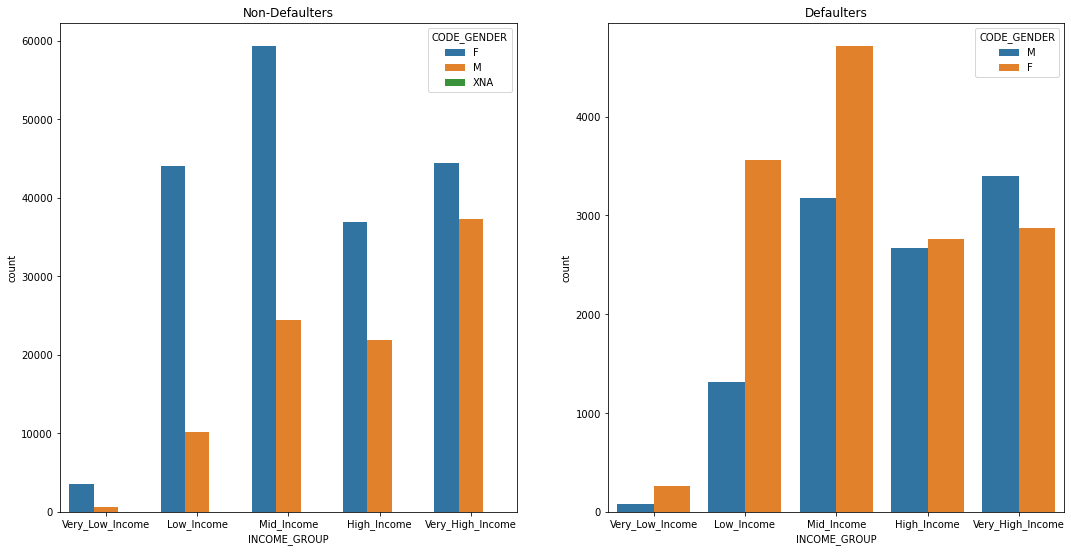

In [79]:
#Bivariate Categorical-Categorical
plt.figure(figsize = (18,9))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='INCOME_GROUP' ,hue='CODE_GENDER' ,data=df0)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='INCOME_GROUP' ,hue='CODE_GENDER' ,data=df1)
plt.show()

- **Males with the very high income and Female with mid-income pay their loans on time. Among Defaulters Mid-Income Females have highest payment difficulties and hence prone to defaults, followed by low income females. Surprisingly among males, Very High Income group has highest defaults- bad credit behaviour**

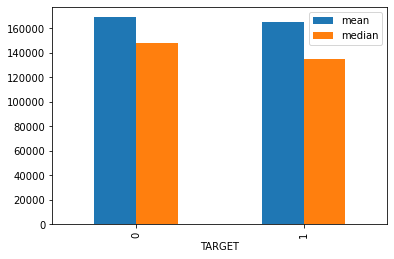

In [80]:
#Bivariate- Continuous-Categorical

df.groupby('TARGET')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar() #df is the combined file(both TARGET-0 and 1)

**Non-Defaulter Category 0 has a higher mean and median income**

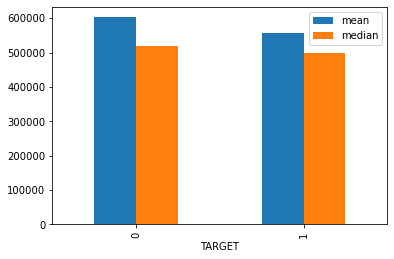

In [81]:
df.groupby('TARGET')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar()

**Non-Defaulter Category 0 has a higher mean and median Credit Amount Disbursed, but Default Category 1 has mean Credit disbursed not far away from Non Defaulter Group- showing considerable probability to make losses in current situation**

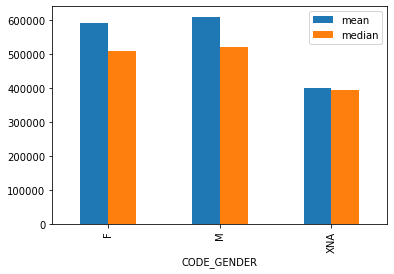

In [82]:
df.groupby('CODE_GENDER')['AMT_CREDIT'].aggregate(['mean','median']).plot.bar()

**Credit disbusrment pattern of Bank is Gender Neutral. But in percentage terms, around 65% percent of females are Non-Defaulters as seen above and around 55% females are in default category. This shows better repayment patterns among female groups

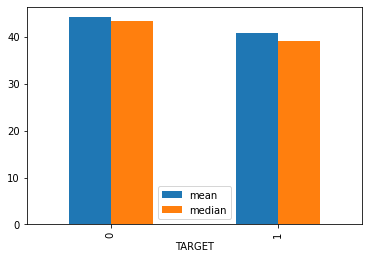

In [83]:
df.groupby('TARGET')['AGE'].aggregate(['mean','median']).plot.bar()

**Non-Defaulter Age group has a higher average age**

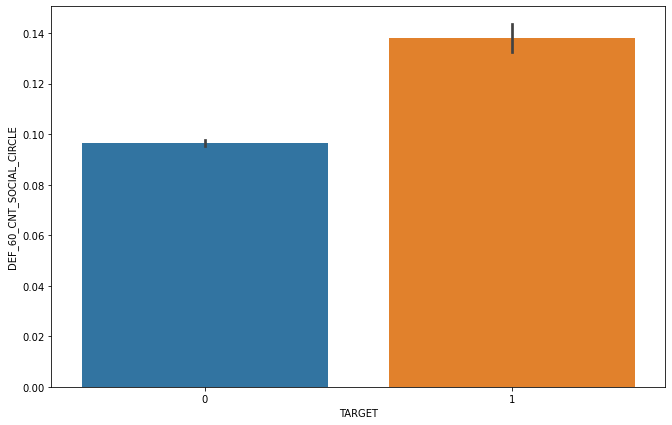

In [84]:

plt.figure(figsize=[11,7])
SOCIAL_DEF = sns.barplot(data=df, y="DEF_60_CNT_SOCIAL_CIRCLE", x="TARGET")
SOCIAL_DEF.set(ylabel='DEF_60_CNT_SOCIAL_CIRCLE', xlabel='TARGET')
plt.show()

**We can see that Defaulter Group has higher number of 60 DPD Default in their social groups.hence this can be used as a reliable metric for prediction of Credit Behaviour, as an indicator for further analysis to check Credit Behaviour Patterns**

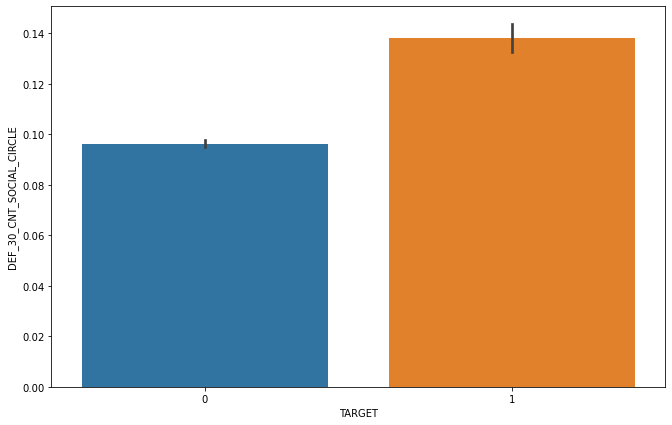

In [85]:
plt.figure(figsize=[11,7])
SOCIAL_DEF = sns.barplot(data=df, y="DEF_60_CNT_SOCIAL_CIRCLE", x="TARGET")
SOCIAL_DEF.set(ylabel='DEF_30_CNT_SOCIAL_CIRCLE', xlabel='TARGET')
plt.show()

**We can see that Defaulter Group has higher number of 30 DPD Default in their social groups.hence this can be used as a reliable metric for prediction of Credit Behaviour, as an indicator for further analysis to check Credit Behaviour Patterns**

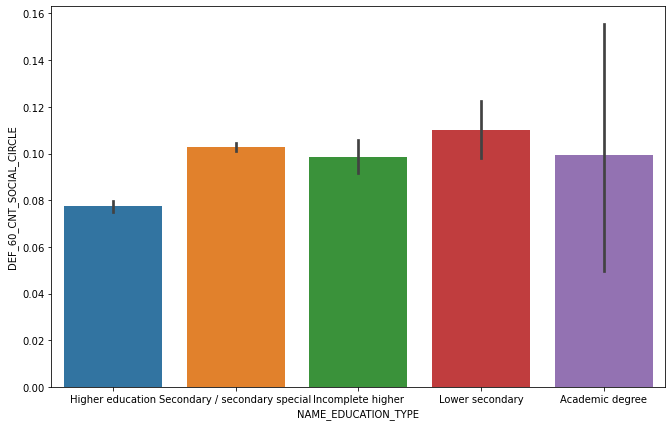

In [87]:
#Bivariate-Continuous-Categorical

plt.figure(figsize=[11,7])
DPD60_edu = sns.barplot(data=df0, y="DEF_60_CNT_SOCIAL_CIRCLE", x="NAME_EDUCATION_TYPE")
DPD60_edu.set(ylabel='DEF_60_CNT_SOCIAL_CIRCLE', xlabel='NAME_EDUCATION_TYPE')
plt.show()

**Clients with Lower Secondary Education have highest 60 DPD Default in their social groups among Non-Defaulter Category, while those with Higher education have the lowest 60 DPD Defaulters among given observations**

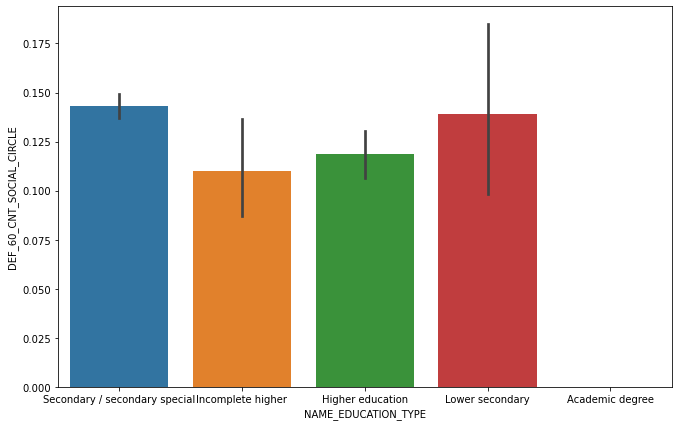

In [88]:
plt.figure(figsize=[11,7])
DPD60_edu = sns.barplot(data=df1, y="DEF_60_CNT_SOCIAL_CIRCLE", x="NAME_EDUCATION_TYPE")
DPD60_edu.set(ylabel='DEF_60_CNT_SOCIAL_CIRCLE', xlabel='NAME_EDUCATION_TYPE')
plt.show()

**Clients with Secondary and  Lower Secondary Education have highest 60 DPD Default in their social groups among Default Category**

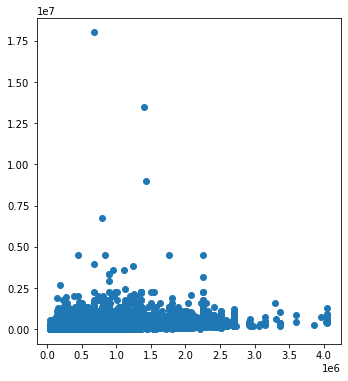

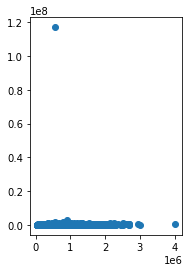

In [86]:
#Bivariate - Continuous Variable 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df0['AMT_CREDIT'] , df0['AMT_INCOME_TOTAL'])
plt.show()
plt.subplot(1,2,1)
plt.scatter(df1['AMT_CREDIT'] , df1['AMT_INCOME_TOTAL'])
plt.show()

**Amount Credit and Total Income do not show association, both among Non Defaulters and Defaulters .However which shows the total income has not been taken into serious consderation with the amount of loan to be provided** 

<Figure size 864x432 with 0 Axes>

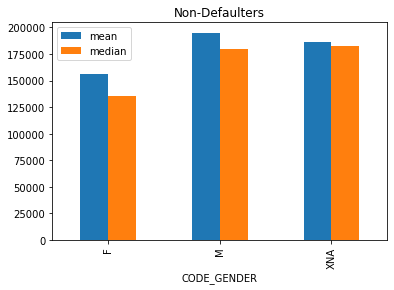

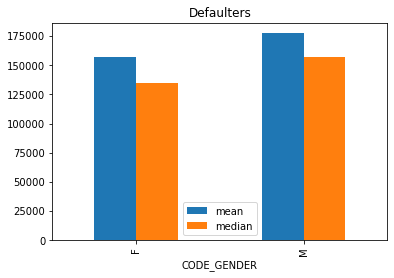

In [89]:
#Bivariate - Categorical _numerical
plt.figure(figsize=(12,6))

df0.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.title('Non-Defaulters')

df1.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.title('Defaulters')
plt.show()

- **Non-Defaulter Group has a higher overall Mean Income than Non-Defaulters, primarily because of the Male Gender group.XNA Group occurs in Non-Defaulter Category alone- implying good credit behaviour among observations.Female category has almost the same mean income in both Non-Defaulter and Defaulter group- they have better credit pattern as well in terms of lower percentage among defaulters as seen before**

- **Variables like Family Status, Age,Property Ownership,Factors indicating Number of Dependants,Indicators of Transparency can be considered more relevant**

In [90]:
df0.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,AMT_REQ_CREDIT_BUREAU_TOTAL,INCOME_GROUP,AGE_GROUP
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,1188,Core staff,1,1,School,1.0,0.0,1.0,0.0,0,1,0,0,0.0,Very_High_Income,<40-50


In [91]:
Socio_Eco = pd.pivot_table(df,index='NAME_EDUCATION_TYPE',columns='TARGET',values='AMT_INCOME_TOTAL')
Socio_Eco

TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,238472.049689,322500.000000
Higher education,209354.906346,196230.025069
Incomplete higher,182036.386124,176466.844610
Lower secondary,130211.115622,129005.395683
Secondary / secondary special,154722.697425,159597.621159


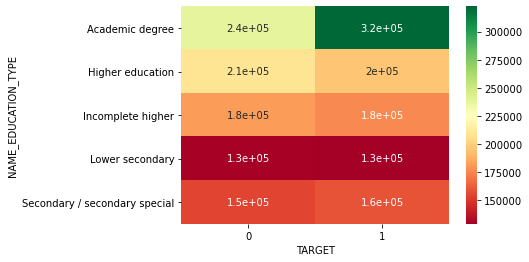

In [92]:
sns.heatmap(Socio_Eco, annot=True, cmap="RdYlGn")

**It is clear that Income values for Non-Default Category is lower in Lower Secondary and Secondary segments. Similar pattern in Non-Defaulter group can be seen**

In [93]:
Credit_Property = pd.pivot_table(df,index='FLAG_OWN_REALTY',columns='TARGET',values='AMT_CREDIT')
Credit_Property

TARGET,0,1
FLAG_OWN_REALTY,,
N,628196.826910,563500.968822
Y,591410.534687,555136.156863


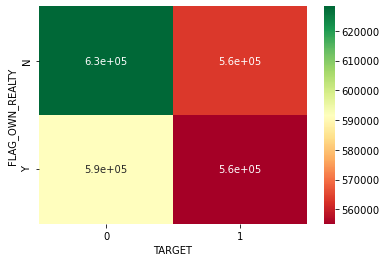

In [94]:
sns.heatmap(Credit_Property, annot=True, cmap="RdYlGn")

**Higher Credit was rolled out to people with no collateral in the Non-default category. This could be a cause for losses and hence should be looked into**

In [95]:
Credit_Occupation = pd.pivot_table(df,index='OCCUPATION_TYPE',columns='TARGET',values='AMT_CREDIT')
Credit_Occupation

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,712090.022004,663798.370253
Cleaning staff,514652.036020,476230.057047
Cooking staff,543520.113803,501909.623188
Core staff,628181.562577,581251.756329
Drivers,618680.601358,562645.289986
HR staff,686600.632827,661307.000000
High skill tech staff,645990.890533,596004.297432
IT staff,649925.560976,613913.691176
Laborers,575075.338636,532940.543679


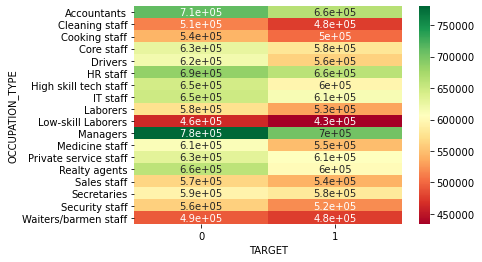

In [96]:
sns.heatmap(Credit_Occupation, annot=True, cmap="RdYlGn")

- **Among Non-defaulter group, highest credit amounts were disbursed to Managers, Accountants and HR Staff and Realty agents-categories showing better credit behaviour among observations**

- **The major difference among Non-Defaulter and Defaulter Group is that more credit was disbursed in overall groups in the non defaulter category.** 

- **In the Defaulter category only the High Skill Tech Staff is the category where the amount disbursed is only slightly less than Non-Defaulter group.**

In [97]:
Doc2 = pd.pivot_table(df,index='FLAG_DOCUMENT_2',columns='TARGET',values='AMT_CREDIT')
Doc3 = pd.pivot_table(df,index='FLAG_DOCUMENT_3',columns='TARGET',values='AMT_CREDIT')
Doc4 = pd.pivot_table(df,index='FLAG_DOCUMENT_4',columns='TARGET',values='AMT_CREDIT')
Doc5 = pd.pivot_table(df,index='FLAG_DOCUMENT_5',columns='TARGET',values='AMT_CREDIT')


<Figure size 1080x648 with 0 Axes>

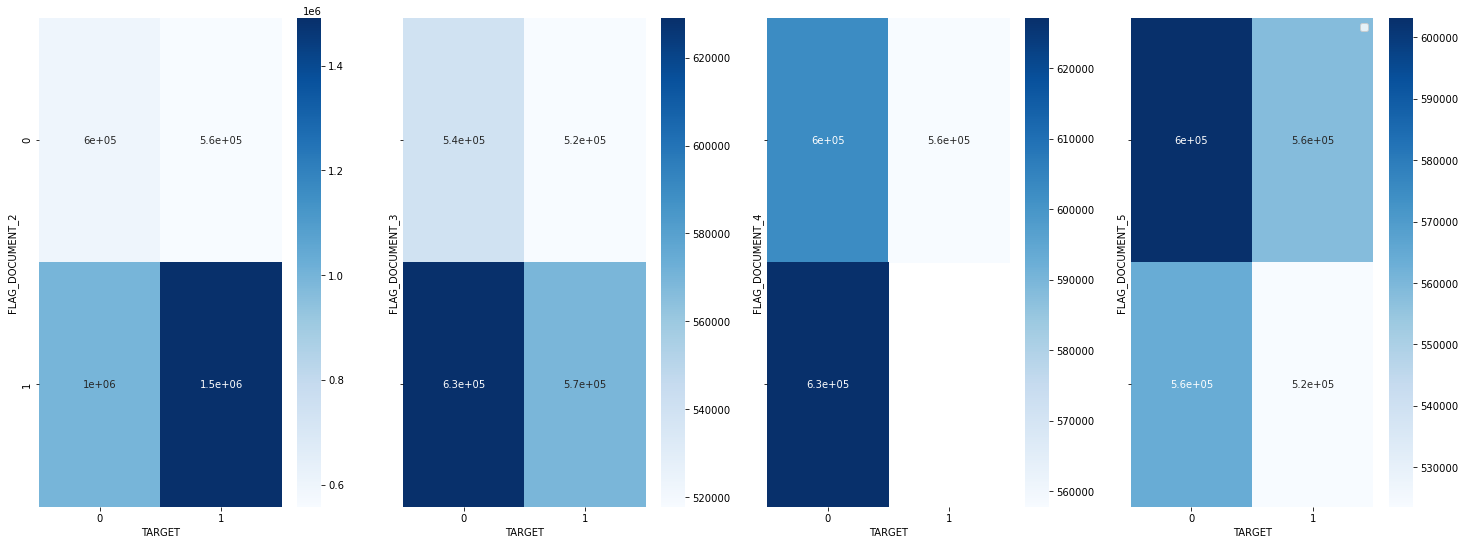

In [98]:
plt.figure(figsize=[15,9])

f,(d2,d3,d4,d5) = plt.subplots(ncols=4,figsize=(25, 9),sharey=True)

d2 = sns.heatmap(Doc2,cmap = "Blues",annot=True,ax=d2)
d2.set_ylabel('FLAG_DOCUMENT_2')
d2.set_xlabel('TARGET')


d3 = sns.heatmap(Doc3,cmap = "Blues",annot=True,ax=d3)
d3.set_ylabel('FLAG_DOCUMENT_3')
d3.set_xlabel('TARGET')

d4 = sns.heatmap(Doc4,cmap = "Blues",annot=True,ax=d4)
d4.set_ylabel('FLAG_DOCUMENT_4')
d4.set_xlabel('TARGET')

d5 = sns.heatmap(Doc5,cmap = "Blues",annot=True,ax=d5)
d5.set_ylabel('FLAG_DOCUMENT_5')
d5.set_xlabel('TARGET')



plt.legend([d2,d3,d4,d5])
plt.show()


Assuming 0 indicates that Client did not provide documents and 1 as an indicator of all documents present


**Except for Flag Document 3, the Credit Disbursed has been higher for people who have not supplied the documents in the Non-Defaulter Category. This indicates that Due Diligence needs to be strengthened for and credit should not be disbursed with incomplete documentation**

In [99]:
p_app= pd.read_csv("previous_application.csv")
p_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
selected_variables = p_app[['SK_ID_CURR',
'NAME_CONTRACT_TYPE',
'AMT_APPLICATION',
'AMT_CREDIT',
'NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS',
'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'CHANNEL_TYPE',
'NFLAG_INSURED_ON_APPROVAL']]

In [101]:
dfp = selected_variables.copy()

In [102]:
dfp

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,CHANNEL_TYPE,NFLAG_INSURED_ON_APPROVAL
0,271877,Consumer loans,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Country-wide,0.0
1,108129,Cash loans,607500.0,679671.0,XNA,Approved,XNA,XAP,Contact center,1.0
2,122040,Cash loans,112500.0,136444.5,XNA,Approved,Cash through the bank,XAP,Credit and cash offices,1.0
3,176158,Cash loans,450000.0,470790.0,XNA,Approved,Cash through the bank,XAP,Credit and cash offices,1.0
4,202054,Cash loans,337500.0,404055.0,Repairs,Refused,Cash through the bank,HC,Credit and cash offices,NaN
...,...,...,...,...,...,...,...,...,...,...
1670209,352015,Consumer loans,267295.5,311400.0,XAP,Approved,Cash through the bank,XAP,Stone,0.0
1670210,334635,Consumer loans,87750.0,64291.5,XAP,Approved,Cash through the bank,XAP,Stone,0.0
1670211,249544,Consumer loans,105237.0,102523.5,XAP,Approved,Cash through the bank,XAP,Country-wide,0.0
1670212,400317,Cash loans,180000.0,191880.0,XNA,Approved,Cash through the bank,XAP,AP+ (Cash loan),1.0


In [103]:
merged_inner = pd.merge(left=df, right=dfp, left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [104]:
merged_inner.shape


(1413701, 40)

In [105]:
merged_inner.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_x                0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_x                        0
AMT_ANNUITY                        93
AMT_GOODS_PRICE                  1208
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
AGE                                 0
DAYS_EMPLOYED                       0
OCCUPATION_TYPE                457580
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
OBS_30_CNT_SOCIAL_CIRCLE            0
DEF_30_CNT_SOCIAL_CIRCLE            0
OBS_60_CNT_SOCIAL_CIRCLE            0
DEF_60_CNT_SOCIAL_CIRCLE            0
FLAG_DOCUMENT_2                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMEN

In [106]:
Credit_hist1 = pd.pivot_table(merged_inner,index='NAME_CONTRACT_TYPE_x',columns='TARGET',values='AMT_CREDIT_x')
Credit_hist1

TARGET,0,1
NAME_CONTRACT_TYPE_x,,
Cash loans,613498.413650,571656.389066
Revolving loans,316846.359982,285403.875836


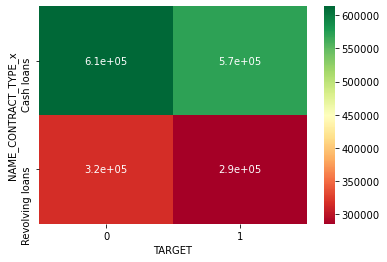

In [111]:
sns.heatmap(Credit_hist1, annot=True, cmap="RdYlGn")

**The credit amount disbursed in both Cash and Revolving Loan Category was higher in non defaulter segment  previous year**

In [108]:
Credit_hist2 = pd.pivot_table(merged_inner,index='NAME_CONTRACT_STATUS',columns='TARGET',values='AMT_CREDIT_x')
Credit_hist2

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,598568.863366,573056.685871
Canceled,584306.823984,543442.741450
Refused,566157.421969,535329.279435
Unused offer,586602.538484,559726.481639


In [109]:
Credit_hist3 = pd.pivot_table(merged_inner,index='FLAG_OWN_REALTY',columns='TARGET',values='AMT_CREDIT_x')
Credit_hist3

TARGET,0,1
FLAG_OWN_REALTY,,
N,601689.011211,552944.346966
Y,586061.683145,560049.853788


**More credit was disbursed to people with no collateral in the Non-defaulter segment previously- while this could be positive sign for supplying credit to weaker social groups,from a profit perspective, its a cause for concern if more losses are occuring**

In [112]:
Credit_hist4 = pd.pivot_table(merged_inner,index='CHANNEL_TYPE',columns='TARGET',values='AMT_CREDIT_x')
Credit_hist4

TARGET,0,1
CHANNEL_TYPE,,
AP+ (Cash loan),509254.896923,493753.366379
Car dealer,748015.784416,748259.357143
Channel of corporate sales,652075.432304,814020.553779
Contact center,617969.399921,558299.972470
Country-wide,594898.638188,560556.535058
Credit and cash offices,591604.088424,563118.928471
Regional / Local,593649.956999,555655.423859
Stone,584154.800308,555573.388642


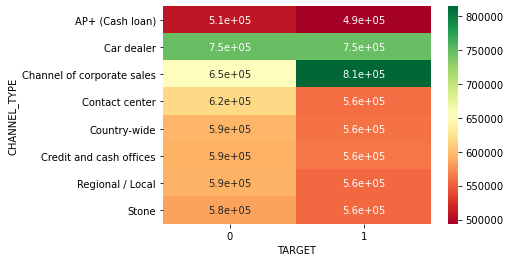

In [112]:
sns.heatmap(Credit_hist4, annot=True, cmap="RdYlGn")

**Regional channels, Stone  have high credit disbursed in previous years in Non Defaulter category, but only slightly. These channels are riskier in terms of Credit Risk. Corporate Sales Channels,followed by Car Dealers have more credit disbursed in Default Category and hence appear riskier** 

In [113]:
Credit_hist5 = pd.pivot_table(merged_inner,index='NFLAG_INSURED_ON_APPROVAL',columns='TARGET',values='AMT_CREDIT_x')
Credit_hist5

TARGET,0,1
NFLAG_INSURED_ON_APPROVAL,,
0.0,602555.672859,568844.047012
1.0,587186.158797,579364.106720


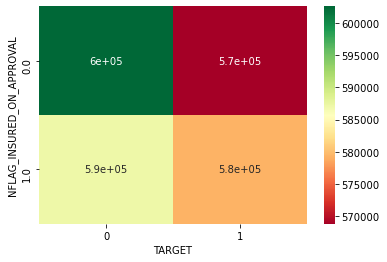

In [114]:
sns.heatmap(Credit_hist5, annot=True, cmap="RdYlGn")

**Higher Credit was disbursed to those clients who were uninsured among Non-Defaulters, in the previous years.**

In [115]:
Credit_hist6 = pd.pivot_table(merged_inner,index='NAME_CASH_LOAN_PURPOSE',columns='TARGET',values='AMT_CREDIT_x')
Credit_hist6

TARGET,0,1
NAME_CASH_LOAN_PURPOSE,,
Building a house or an annex,600218.563366,573371.902778
Business development,637319.055911,598666.500000
Buying a garage,661390.967890,587502.642857
Buying a holiday home / land,656638.411765,776659.418182
Buying a home,599126.440843,481260.482143
Buying a new car,662302.663772,517025.475000
Buying a used car,583761.767782,591864.000000
Car repairs,523474.795213,492978.330709
Education,525487.729899,525907.221429


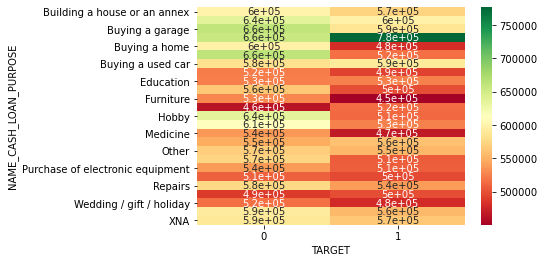

In [116]:
sns.heatmap(Credit_hist6, annot=True, cmap="RdYlGn")

**Home Loans-Buying a garage/home, Hobby, Medicine are the major areas where credit was disbursed in Non-Default Category**

In [120]:
Credit_hist7 = pd.pivot_table(merged_inner,index='NAME_CONTRACT_STATUS',columns='FLAG_OWN_REALTY',values='AMT_CREDIT_x')
Credit_hist7

FLAG_OWN_REALTY,N,Y
NAME_CONTRACT_STATUS,,
Approved,609080.467814,591720.787342
Canceled,581676.540889,580186.559848
Refused,569120.903579,559926.503186
Unused offer,591827.870902,581354.772261


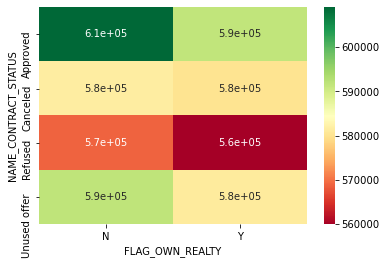

In [126]:
sns.heatmap(Credit_hist7, annot=True, cmap="RdYlGn")

**Higher credit was disbursed in previous years to People who had no collateral**

In [131]:
Credit_hist8 = pd.pivot_table(merged_inner,index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',values='AMT_CREDIT_x')
Credit_hist8

INCOME_GROUP,Very_Low_Income,Low_Income,Mid_Income,High_Income,Very_High_Income
NAME_CONTRACT_STATUS,,,,,
Approved,298433.104513,397471.533414,517637.625224,625004.598013,784847.840802
Canceled,301639.153340,384476.129394,490159.756663,587078.017803,743253.461986
Refused,314972.602070,373747.607226,476539.195543,565599.431775,721199.428513
Unused offer,281260.375000,392835.796486,501383.862559,599770.146974,761374.373100


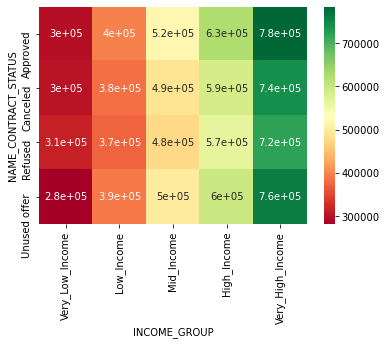

In [132]:
sns.heatmap(Credit_hist8, annot=True, cmap="RdYlGn")

**Those in High Income and Very High Income groups are most preffered for credit in previous years- because of higher repayment capacity**

In [129]:
Credit_hist9 = pd.pivot_table(merged_inner,index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',values='AMT_CREDIT_x')
Credit_hist9

AGE_GROUP,<30,<30-40,<40-50,<50-60,<60+
NAME_CONTRACT_STATUS,,,,,
Approved,483411.893500,597823.336792,654025.320230,639531.012202,517512.241995
Canceled,468603.106500,570196.029516,626595.462721,626819.622819,525348.918895
Refused,453793.488099,538231.018736,612601.913449,615343.174648,543845.573110
Unused offer,482411.210861,583566.145415,647412.241911,650221.494973,515017.019475


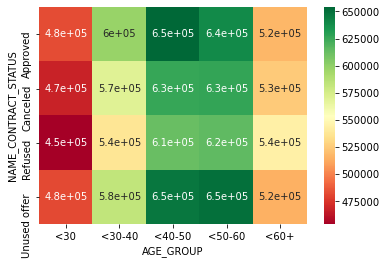

In [130]:
sns.heatmap(Credit_hist9, annot=True, cmap="RdYlGn")

**Those between Age Groups 40-60 are most preffered for credit in previous years- because of higher repayment capacity**

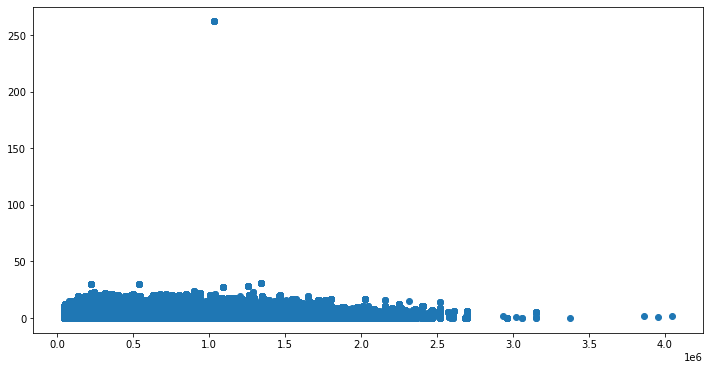

In [117]:
#Bivariate - Continuous Variable 
plt.figure(figsize=(12,6))

plt.scatter(merged_inner['AMT_CREDIT_x'] , merged_inner['AMT_REQ_CREDIT_BUREAU_TOTAL'])
plt.show()


#Below variables show no association

**Summary of the Analysis** 


- Social Indicators-Based on the patterns of associations observed between various factors, it can be said that in geenral, Female and XNA Gender Groups show better credit behavious than Males. Also, Females have shown better repayment even though their mean income was lower than males; similarly Married and Widowed Groups are preferred to Single customers because of better credit capacity. The Credit disbursement pattern shows that Higher income and Higher education categories are most preferred for loan disbursement. An important indicator is that number of defaulters in peer groups of customers can also be used as an indicator for credit payment patterns, this can be more the case for customers with primary and secondary education backgrounds as their highest education levels.Middle Age Grouops are preffered to younger age groups under 30.

- Economic Indicators- It has been noticed that High Income Groups are preferred customers because of better repayment tendencies, .Managers, Accountants and HRs have shown better credit repayment patterns. A cause of concern may be that the Consumer Finance bank has given a lot of credit to customers with no collateral present in the default category- this can result in more losses for the bank and should be considered. Labourers occur as a major chunk in the defaulter segment, because of socio-economic reasons. A way out could be giving loans to labour groups rather than individuals to facilitate repayment, based on the success of women SHGs. Also, self employed and business owners occur as categories with repayment difficulties. 

- Demographic Indicators- Females and XNA groups show better credit patterns among observations. Groups with single customers and mature age groups are preffered for credit disbursement.

- Credit Indicators- It has been observed that the bank is lending money to customers without adequate due dildigence. Credit was given out without the presence of required documents and hence this could be a defifnite cause of concern. Also, on the type of laon contract, rolling loans, even though a lower percentage among defaulters could be a cause of concern, if resulting in losses in absolute amounts. It has also been noticed that the bank has given considerable credit to defaulters with no collateral as mentioned above. 


Based on the above it could be said that the Consumer Finance Company needs to strengthen its due diligence capabilities based on documents procured, pay more attention to credit behaviour of peer groups of clients, continue to prefer High education, High Income segments as profit segments, role out new products to facilitate payments for low income groups like laboureres. The Bank could also mark XNA and Female,weaker social groups as groups with better credit patterns. It needs to consider quality of collateral and presence of collateral as factors impacting bottomline and hence pay attention. Some channels of loans could be risky and might need more research for purposes of profitability. These are some of the major pin points for the bank to improve its credit decisions and improve profitability. 